## Medical Insurance Cost Prediction project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

Importing the data

In [3]:
medi =pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')

In [4]:
medi

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
medi.shape

(1338, 7)

Observations:
1) The data consists of 7 columns in which 6 are the independent variables and one is dependent varaible. Our target(dependent) varaible is charges.

2) Columns such as age, bmi, children and charges(target variable) are integer data type. 

3) Columns Sex, Smoker and religion are string as well as categorical data, which we will be encoding going forward in this project.

4) Our target variable is a continous in form so we will be using all the regression models on this data.

In [6]:
medi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
medi.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Observations:
    
1) From the above figures it can be seen that there are no negative values in the data so the data is good and will be helpfull in achieving our goal.

2) For the column charges the mean is more then the median which suggests the skewness in data. All other columns looks fine.

3) There is not much difference in 75th percentile and maximum value of all columns except the charges columns which suggest the outliers in the column.

4) We will check for the null values in the data as also the graphical analysis.

In [8]:
medi.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

So there is no null value in whole data which is good and will help us predict our target more precisely.

In [9]:
medi.skew()

C:\Users\Kushal Kulkarni\AppData\Local\Temp\ipykernel_22148\3750823170.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medi.skew()


age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

Skewness for all the columns exept the charges columns looks in the limit, we will check removing skewness for the column.

<AxesSubplot:ylabel='Frequency'>

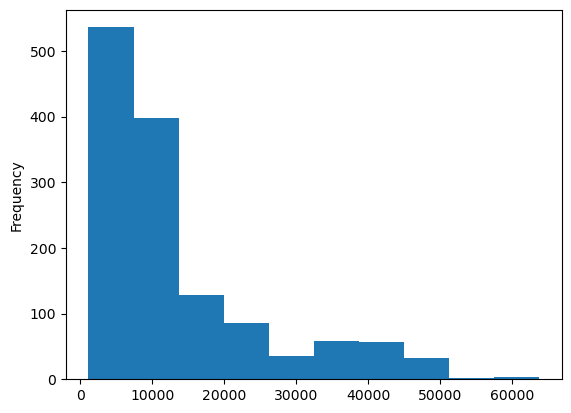

In [10]:
medi['charges'].plot.hist()

In [11]:
medi['charges'] = np.log(medi['charges'])

In [12]:
medi['charges'].skew()

-0.09009752473024582

<AxesSubplot:ylabel='Frequency'>

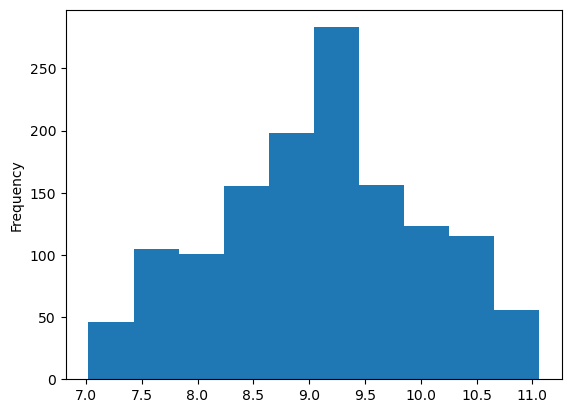

In [13]:
medi['charges'].plot.hist()

So the skewness for the charges column has been removed and the data is now distrubuted normally can be seen in graph.

<AxesSubplot:ylabel='Frequency'>

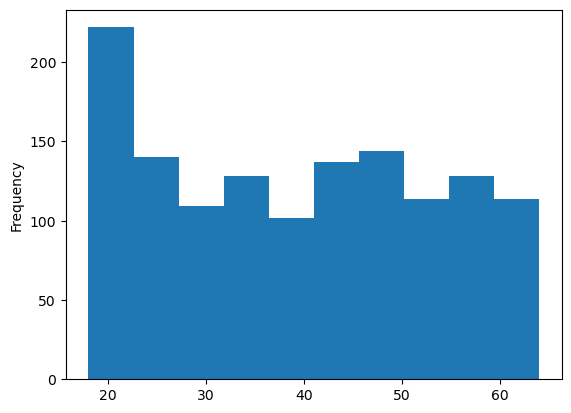

In [14]:
medi['age'].plot.hist()

In the age column it can bee seen that data is distrubuted pretty well.

<AxesSubplot:ylabel='Frequency'>

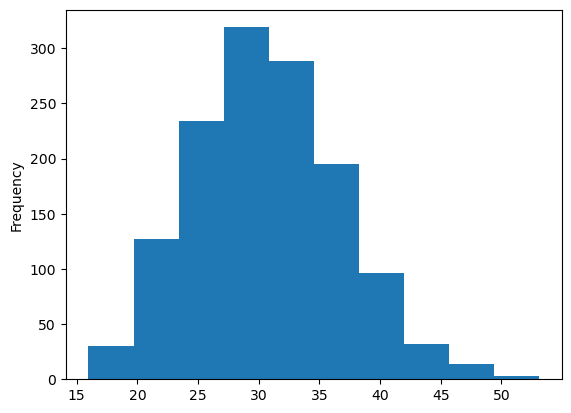

In [15]:
medi['bmi'].plot.hist()

In BMI column as well the data is distrubuted normally.

<AxesSubplot:ylabel='Frequency'>

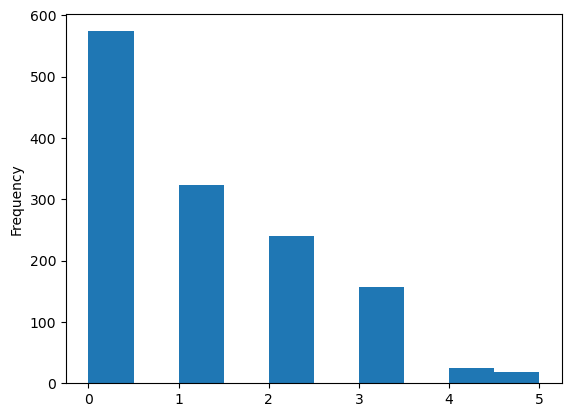

In [16]:
medi['children'].plot.hist()

In the Children we can see the skewness is there but it can treated as categorical data hence we are not working on the skewness currently. We wil reduce the same if needed.

Checking the correlation of the columns.

<function matplotlib.pyplot.show(close=None, block=None)>

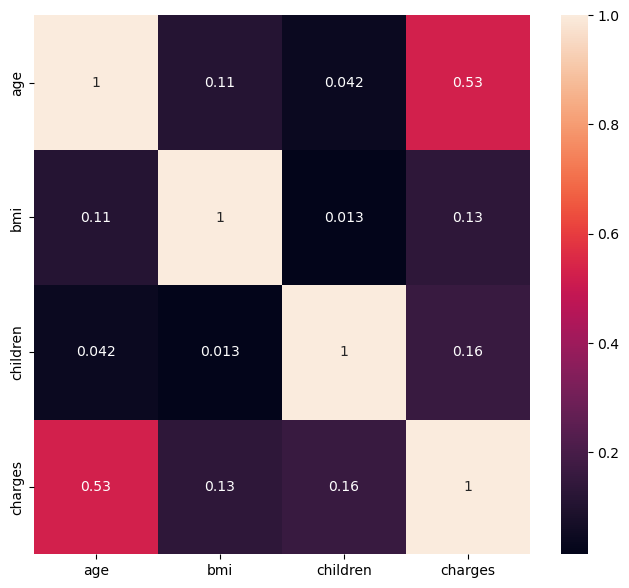

In [17]:
plt.figure(figsize = (8,7))
sns.heatmap(medi.corr(), annot = True)
plt.show

From the above heatmap it can be seen that there is negative correlation between age, children and bmi. We will check the same through pair and scatter plot.

For more details we will be encoding or typecasting the columns in object state and then do the more graphical analysis.

In [18]:
from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()

for i in medi.columns:
    if medi[i].dtypes == 'object':
        medi[i] = OE.fit_transform(medi[i].values.reshape(-1,1))

In [19]:
medi

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,9.734176
1,18,1.0,33.770,1,0.0,2.0,7.453302
2,28,1.0,33.000,3,0.0,2.0,8.400538
3,33,1.0,22.705,0,0.0,1.0,9.998092
4,32,1.0,28.880,0,0.0,1.0,8.260197
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,9.268661
1334,18,0.0,31.920,0,0.0,0.0,7.698927
1335,18,0.0,36.850,0,0.0,2.0,7.396233
1336,21,0.0,25.800,0,0.0,3.0,7.604867


So from our new DataFrame it can seen that all the oject columns are now converted into integer data.

In [20]:
medi['region'].nunique()

4

In [21]:
medi['sex'].nunique()

2

In [22]:
medi['smoker'].nunique()

2

In the new dataset after the Encoding the of the data from object to integer the following are particulars,

In the column 'Sex' - There were 2 Values. Male & Female which are now 0 = Female and 1 = Male.

Similarly in columns 'Smoker' - There were 2 Values. Yes and No which are now = 0 = No and 1 = Yes.

In the column 'Region' there were 4 different values. Southwest, Southeast, Northwest, Northeast which are now.

0 - Northeast

1 - Northwest

2 - Southeast

3 - Southwest

Now again we will be checking the correlation of the columns in the data set.

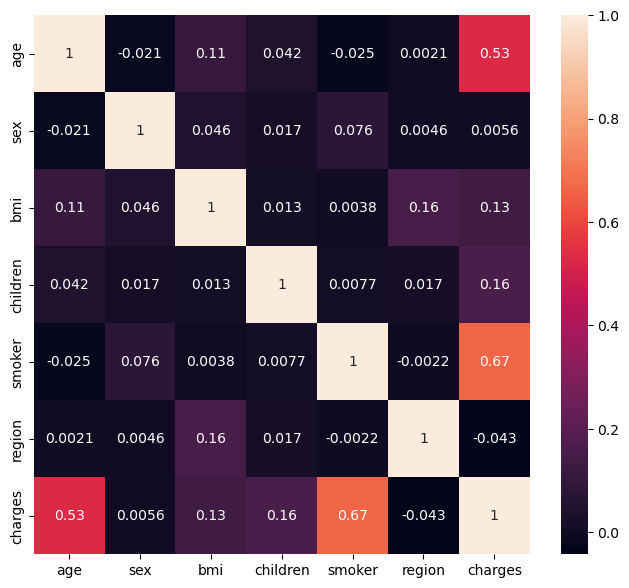

In [23]:
plt.figure(figsize =(8,7))
sns.heatmap(medi.corr(), annot = True)
plt.show()

From the above heatmap of the correlation it can be seen that only 2 columns are having positive relation with Charges column which is our target variable.
This means that as the age increases the charges increases and if the person is smoker then charges increases.

All other columns seems not having positive relation with our target varibale.

We wil check the relation of age, smoker and charges column further.

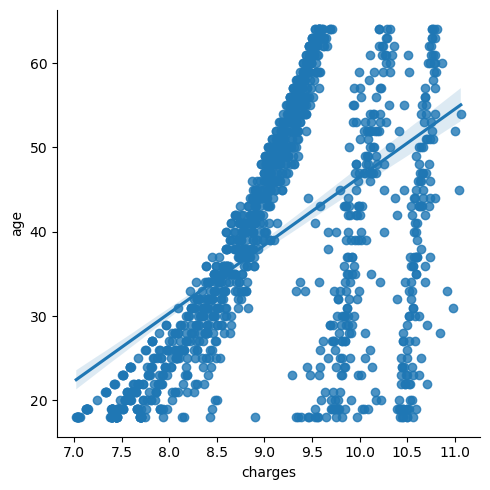

In [24]:
sns.lmplot(x= 'charges', y ='age', data = medi)

So the above graph confirms that there is strong positive relation.

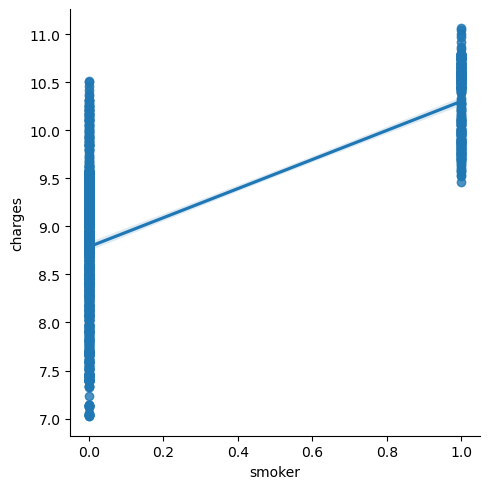

In [25]:
sns.lmplot(x= 'smoker', y ='charges', data = medi)

So if the persone is smoker the cost of the insurance is higher.

Checking the outliers through boxplot.

age            AxesSubplot(0.125,0.53;0.168478x0.35)
sex         AxesSubplot(0.327174,0.53;0.168478x0.35)
bmi         AxesSubplot(0.529348,0.53;0.168478x0.35)
children    AxesSubplot(0.731522,0.53;0.168478x0.35)
smoker         AxesSubplot(0.125,0.11;0.168478x0.35)
region      AxesSubplot(0.327174,0.11;0.168478x0.35)
charges     AxesSubplot(0.529348,0.11;0.168478x0.35)
dtype: object

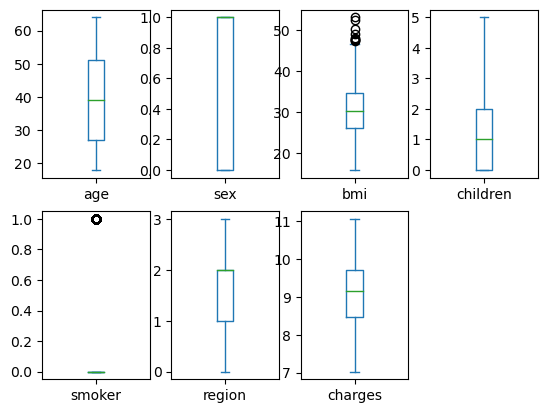

In [26]:
medi.plot(kind = 'box', subplots = True, layout = (2,4))

So from the above box plots it can be seen that only 2 columns are present with the outliers which are 'bmi' and 'smoker'. We will be trying to remove outliers through Zscore method.

In [27]:
from scipy.stats import zscore

In [28]:
Z = np.abs(zscore(medi))
Z

,age,sex,bmi,children,smoker,region,charges
0,1.438764,1.010519,0.453320,0.908614,1.970587,1.343905,0.691394
1,1.509965,0.989591,0.509621,0.078767,0.507463,0.438495,1.790020
2,0.797954,0.989591,0.383307,1.580926,0.507463,0.438495,0.759500
3,0.441948,0.989591,1.305531,0.908614,0.507463,0.466915,0.978513
4,0.513149,0.989591,0.292556,0.908614,0.507463,0.466915,0.912181
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,0.507463,0.466915,0.184949
1334,1.509965,1.010519,0.206139,0.908614,0.507463,1.372326,1.522799
1335,1.509965,1.010519,1.014878,0.908614,0.507463,0.438495,1.852106
1336,1.296362,1.010519,0.797813,0.908614,0.507463,1.343905,1.625129


In [29]:
threshold = 3
print(np.where(Z>3))

(array([  32,   71,  116,  166,  413,  425,  438,  568,  640,  847,  877,
        932,  937,  969,  984, 1047, 1085, 1116, 1130, 1245, 1272, 1317],
      dtype=int64), array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2],
      dtype=int64))


So the above mentioned columns are having the Zscore value of more then 3 hence we will remove them from our data.

In [30]:
medi1 = medi[(Z<3).all(axis =1)]
medi1

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,9.734176
1,18,1.0,33.770,1,0.0,2.0,7.453302
2,28,1.0,33.000,3,0.0,2.0,8.400538
3,33,1.0,22.705,0,0.0,1.0,9.998092
4,32,1.0,28.880,0,0.0,1.0,8.260197
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,9.268661
1334,18,0.0,31.920,0,0.0,0.0,7.698927
1335,18,0.0,36.850,0,0.0,2.0,7.396233
1336,21,0.0,25.800,0,0.0,3.0,7.604867


In [31]:
print('So after removing the ouliers our new Data shape is', medi1.shape)

So after removing the ouliers our new Data shape is (1316, 7)


It can be seen data we have lost we few amount of rows after the removing the outliers which a good sign for our data.

We have splitted our independent varaibles and our target variable.

In [32]:
medi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   float64
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   float64
 5   region    1338 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.3 KB


In [33]:
medi1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1316 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1316 non-null   int64  
 1   sex       1316 non-null   float64
 2   bmi       1316 non-null   float64
 3   children  1316 non-null   int64  
 4   smoker    1316 non-null   float64
 5   region    1316 non-null   float64
 6   charges   1316 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 82.2 KB


In [34]:
x = medi1.iloc[:,:-1]
y = medi1.iloc[:,-1]

In [35]:
x.shape

(1316, 6)

In [36]:
y.shape

(1316,)

In [37]:
x

,age,sex,bmi,children,smoker,region
0,19,0.0,27.900,0,1.0,3.0
1,18,1.0,33.770,1,0.0,2.0
2,28,1.0,33.000,3,0.0,2.0
3,33,1.0,22.705,0,0.0,1.0
4,32,1.0,28.880,0,0.0,1.0
...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0
1334,18,0.0,31.920,0,0.0,0.0
1335,18,0.0,36.850,0,0.0,2.0
1336,21,0.0,25.800,0,0.0,3.0


In [38]:
y

0        9.734176
1        7.453302
2        8.400538
3        9.998092
4        8.260197
          ...    
1333     9.268661
1334     7.698927
1335     7.396233
1336     7.604867
1337    10.279914
Name: charges, Length: 1316, dtype: float64

In [39]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x1 = pd.DataFrame(sc.fit_transform(x),columns = x.columns)
x1

,age,sex,bmi,children,smoker,region
0,-1.441444,-1.006098,-0.453768,-0.928234,1.959141,1.352089
1,-1.512509,0.993939,0.527239,-0.038536,-0.510428,0.446568
2,-0.801858,0.993939,0.398555,1.740862,-0.510428,0.446568
3,-0.446533,0.993939,-1.321967,-0.928234,-0.510428,-0.458954
4,-0.517598,0.993939,-0.289988,-0.928234,-0.510428,-0.458954
...,...,...,...,...,...,...
1311,0.761574,0.993939,0.059297,1.740862,-0.510428,-0.458954
1312,-1.512509,-1.006098,0.218063,-0.928234,-0.510428,-1.364475
1313,-1.512509,-1.006098,1.041975,-0.928234,-0.510428,0.446568
1314,-1.299314,-1.006098,-0.804724,-0.928234,-0.510428,1.352089


In [40]:
y.dtypes

dtype('float64')

In [41]:
y1 = pd.DataFrame(y.astype('int64'))

In [42]:
y1

,charges
0,9
1,7
2,8
3,9
4,8
...,...
1333,9
1334,7
1335,7
1336,7


In [43]:
y1.nunique()

charges    5
dtype: int64

In [44]:
y

0        9.734176
1        7.453302
2        8.400538
3        9.998092
4        8.260197
          ...    
1333     9.268661
1334     7.698927
1335     7.396233
1336     7.604867
1337    10.279914
Name: charges, Length: 1316, dtype: float64

In [45]:
from sklearn.linear_model import LinearRegression
maxacc = 0
maxrs = 0

for i in range (1,200):
    x_train,x_test,y_train,y_test =train_test_split(x1,y,test_size = .30, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test,pred)
    if r2 > maxacc:
        maxacc = r2
        maxrs = i
    
print('The maximum r2 score is ', maxacc , 'at random state', maxrs)

The maximum r2 score is  0.8206456149557433 at random state 11


Importing Various types of Rgression Algorithms

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

Now we will pass the data through all the Algorithms and check the Model with highest r2_score and minimum error rate.

In [47]:
from sklearn.metrics import r2_score

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size = 0.30, random_state = maxrs)

In [49]:
x1.shape

(1316, 6)

In [50]:
y.shape

(1316,)

In [51]:
x_train.shape

(921, 6)

In [52]:
y_train.shape

(921,)

In [53]:
lr = LinearRegression()
lr.fit(x_train, y_train)
predlr = lr.predict(x_test)
r2_score1 = r2_score(y_test, predlr)
MSE = mean_squared_error(y_test, predlr)
MAE = mean_absolute_error(y_test,predlr)

print('The r2 score for Linear Regression is', r2_score1)
print('The Mean Squared Error for Linear Regression is', MSE)
print('The Mean Absolute Error for Linear Regression is', MAE)

The r2 score for Linear Regression is 0.8206456149557433
The Mean Squared Error for Linear Regression is 0.15812270089407549
The Mean Absolute Error for Linear Regression is 0.27094456157566504


In [54]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
predrfr = rfr.predict(x_test)
rfrscore = r2_score(y_test, predrfr)
rfr_MSE = mean_squared_error(y_test,predrfr)
rfr_MAE = mean_absolute_error(y_test,predrfr)

print('The r2 score for Random Forest Regression is',rfrscore)
print('The Mean Squared Error for Random Forest Regression is', rfr_MSE)
print('The Mean Absolute Error for Random Forest Regression is', rfr_MAE)

The r2 score for Random Forest Regression is 0.848754998239257
The Mean Squared Error for Random Forest Regression is 0.13334086127437944
The Mean Absolute Error for Random Forest Regression is 0.22022457717381094


In [55]:
knr = KNeighborsRegressor()

knr.fit(x_train,y_train)
predknr = knr.predict(x_test)
knr_score = r2_score(y_test, predknr)
knr_MSE = mean_squared_error(y_test, predknr)
knr_MAE = mean_absolute_error(y_test, predknr)

print('The score of KNeighbors Regressor is', knr_score)
print('The Mean Squared Error of KNeighbors Regressor is', knr_MSE)
print('The Mean Absolute Error if KNeighbors Regressor is', knr_MAE)

The score of KNeighbors Regressor is 0.8519323080008534
The Mean Squared Error of KNeighbors Regressor is 0.13053967634122748
The Mean Absolute Error if KNeighbors Regressor is 0.2391804792259176


In [56]:
gbr = GradientBoostingRegressor()

gbr.fit(x_train,y_train)
predgbr = gbr.predict(x_test)
gbr_score = r2_score(y_test, predgbr)
gbr_MSE = mean_squared_error(y_test, predgbr)
gbr_MAE = mean_absolute_error(y_test, predgbr)

print('The Score of Gradient Bosst Regressor is', gbr_score)
print('The Mean Squared Error of Gradient Boost Regressor is', gbr_MSE)
print('The Mean Absolute Error of Gradient Boost Regressor is', gbr_MAE)

The Score of Gradient Bosst Regressor is 0.8895050486971335
The Mean Squared Error of Gradient Boost Regressor is 0.09741473636597917
The Mean Absolute Error of Gradient Boost Regressor is 0.2024462182310774


In [57]:
svr = SVR()

svr.fit(x_train,y_train)
predsvr = svr.predict(x_test)
svr_score = r2_score(y_test, predsvr)
svr_MSE = mean_squared_error(y_test, predsvr)
svr_MAE = mean_absolute_error(y_test, predsvr)

print('The Score of Support Vector Regressor is', svr_score)
print('The Mean Squared Error of Support Vector Regressor is', svr_MSE)
print('The Mean Absolute Error of Support Vector Regressor is', svr_MAE)

The Score of Support Vector Regressor is 0.9182313345158112
The Mean Squared Error of Support Vector Regressor is 0.07208902214280222
The Mean Absolute Error of Support Vector Regressor is 0.13963253077510418


In [58]:
from sklearn.linear_model import Lasso,Ridge

In [59]:
lasso = Lasso()

lasso.fit(x_train, y_train)
predlasso = lasso.predict(x_test)
lasso_score = r2_score(y_test, predlasso)
lasso_MSE = mean_squared_error(y_test, predlasso)
lasso_MAE = mean_absolute_error(y_test, predlasso)

print('The Score for Lasso is', lasso_score)
print('The Mean Squared Error for Lasso is', lasso_MSE)
print('The Mean Absolute Error for Ridge is,', lasso_MAE)

The Score for Lasso is -0.0023529280691318988
The Mean Squared Error for Lasso is 0.8836959977101569
The Mean Absolute Error for Ridge is, 0.7634890643564338


In [60]:
ridge = Ridge()

ridge.fit(x_train,y_train)
predridge = ridge.predict(x_test)
ridge_score = r2_score(y_test, predridge)
ridge_MSE = mean_squared_error(y_test, predridge)
ridge_MAE = mean_absolute_error(y_test, predridge)

print('The Score for Ridge is', ridge_score)
print('The Mean Squared Error for Ridge is', ridge_MSE)
print('The Mean Absolute Error for Ridge is', ridge_MAE)

The Score for Ridge is 0.8204980666228483
The Mean Squared Error for Ridge is 0.15825278269220944
The Mean Absolute Error for Ridge is 0.2711506300697972


In [61]:
from sklearn.ensemble import ExtraTreesRegressor

In [62]:
etr = ExtraTreesRegressor()

etr.fit(x_train,y_train)
predetr = etr.predict(x_test)
etr_score = r2_score(y_test, predetr)
etr_MSE = mean_squared_error(y_test, predetr)
etr_MAE = mean_absolute_error(y_test,predetr)

print('The Score for Extra Trees Regressor is', etr_score)
print('The Mean Squared Error for Extra Trees Regressor is', etr_MSE)
print('The Mean Absolute Error ofr Extra Trees Regressot is', etr_MAE)

The Score for Extra Trees Regressor is 0.8181804135054028
The Mean Squared Error for Extra Trees Regressor is 0.1602960757545766
The Mean Absolute Error ofr Extra Trees Regressot is 0.20786709781181806


In [63]:
print('So our best model for the given data is Support Vector Regressor with', svr_score.round(3)*100 ,'accuracy and least error rate with', svr_MSE.round(3), '&', svr_MAE.round(3))

So our best model for the given data is Support Vector Regressor with 91.8 accuracy and least error rate with 0.072 & 0.14


As our best model for this data is Suppor Vector  Regressor we will check the Score towards the Training Data as well and compare the same with test Score.

In [64]:
pred_train = svr.predict(x_train)
svr_score_train = r2_score(y_train, pred_train)

print('SVR score on test data is', svr_score.round(3)*100)
print('SVR score on training data is', svr_score_train.round(2)*100)

SVR score on test data is 91.8
SVR score on training data is 81.0


So the SVR score for the test data for Unseen data is more as compared to seen data and SVR is also having the least error score so we can final SVR as out best model.

We will check the Regression line through the graph.

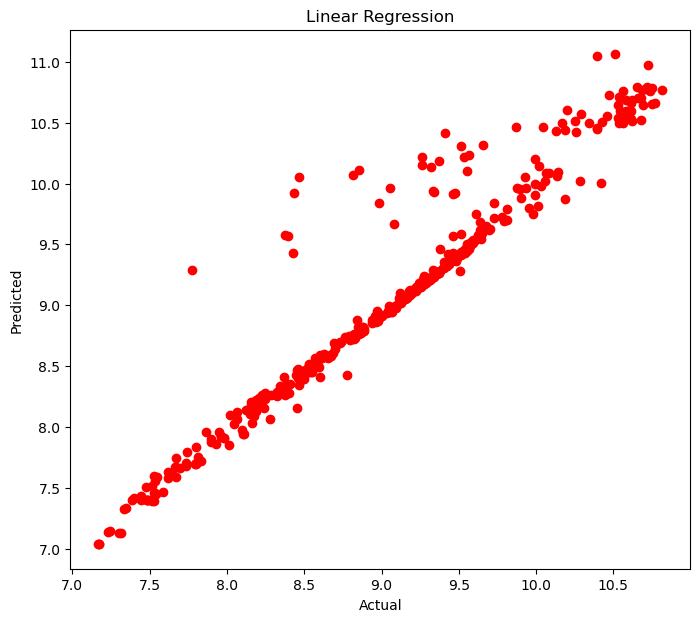

In [65]:
plt.figure(figsize = (8,7))
plt.scatter(x = predsvr, y = y_test, color = 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')
plt.show()

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
score1 = cross_val_score(svr,x1,y)
print(score1)
print(score1.mean())
print(svr_score)
print('The difference between the r2 score and the cross validation score of SVR is ', (svr_score - score1.mean())*100)

[0.89416266 0.71562252 0.90971074 0.83379707 0.80514061]
0.83168671834718
0.9182313345158112
The difference between the r2 score and the cross validation score of SVR is  8.654461616863118


In [68]:
score2 = cross_val_score(lr,x1,y)
print(score2)
print(score2.mean())
print(r2_score1)
print('The difference between the r2 score and the cross validation score of Linear Regression is ', (r2_score1 - score2.mean())*100)

[0.79695725 0.6879537  0.83213472 0.76538498 0.735755  ]
0.7636371302746745
0.8206456149557433
The difference between the r2 score and the cross validation score of Linear Regression is  5.700848468106878


In [69]:
score3 = cross_val_score(rfr,x1,y)
print(score3)
print(score3.mean())
print(rfrscore)
print('The difference between the r2 score and the cross validation score of Random Forest Regressor is ', (rfrscore - score3.mean())*100)

[0.85298699 0.70125394 0.85463079 0.81776728 0.78911621]
0.8031510413673661
0.848754998239257
The difference between the r2 score and the cross validation score of Random Forest Regressor is  4.560395687189089


In [70]:
score4 = cross_val_score(knr,x1,y)
print(score4)
print(score4.mean())
print(knr_score)
print('The difference between the r2 score and the cross validation score of Kneighbors Regressor is ', (knr_score - score4.mean())*100)

[0.84907092 0.69748156 0.84709273 0.81207989 0.79081853]
0.7993087271341052
0.8519323080008534
The difference between the r2 score and the cross validation score of Kneighbors Regressor is  5.262358086674823


In [71]:
score5 = cross_val_score(gbr,x1,y)
print(score5)
print(score5.mean())
print(gbr_score)
print('The difference between the r2 score and the cross validation score of Gradient Boost Regressor is ', (gbr_score - score5.mean())*100)

[0.87217968 0.73272596 0.90194987 0.83969986 0.80455707]
0.8302224858442775
0.8895050486971335
The difference between the r2 score and the cross validation score of Gradient Boost Regressor is  5.928256285285604


In [72]:
score6 = cross_val_score(ridge,x1,y)
print(score6)
print(score6.mean())
print(ridge_score)
print('The difference between the r2 score and the cross validation score of Ridge is ', (ridge_score - score6.mean())*100)

[0.79691437 0.68807639 0.83198991 0.76542599 0.73579464]
0.7636402616416333
0.8204980666228483
The difference between the r2 score and the cross validation score of Ridge is  5.685780498121495


In [73]:
score7 = cross_val_score(etr,x1,y)
print(score7)
print(score7.mean())
print(etr_score)
print('The difference between the r2 score and the cross validation score of Kneighbors Regressor is ', (etr_score - score7.mean())*100)

[0.816221   0.674567   0.84290728 0.79525586 0.7675122 ]
0.7792926694721339
0.8181804135054028
The difference between the r2 score and the cross validation score of Kneighbors Regressor is  3.888774403326889


In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
param = {'alpha': [1.0,.05,.4,2],'fit_intercept': [True, False],
         'solver': ['auto','svd','cholesky','lsqr','sag','saga','lbfgs'], 
         'positive':[False, True],
         'random_state': [1,4,10,20]}


gscv = GridSearchCV(Ridge(),param, cv =5)

In [77]:
gscv.fit(x_train,y_train)

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
960 fits failed out of a total of 2240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\sklearn\linear_model\_ridge.py", line 1011, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\sklearn\linear_model\_ridge.py", line 705, 

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [78]:
gscv.best_params_

{'alpha': 2,
 'fit_intercept': True,
 'positive': False,
 'random_state': 20,
 'solver': 'sag'}

In [79]:
Model = Ridge(alpha = 2, fit_intercept = True,positive = False, random_state = 20, solver = 'sag' )

In [80]:
Model.fit(x_train,y_train)
Mpred = Model.predict(x_test)
Mscore = r2_score(y_test, Mpred)
Mmse = mean_squared_error(y_test, Mpred)
Mmae = mean_absolute_error(y_test,Mpred)

print(Mscore)
print(Mmse)
print(Mmae)

0.8202833926692679
0.15844204388782154
0.2714035010389292


In [82]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],}



In [83]:
gscv1 = GridSearchCV(GradientBoostingRegressor(), param_grid, cv = 5)

In [84]:
gscv1.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [86]:
gscv1.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [87]:
Model1 = GradientBoostingRegressor(learning_rate= 0.05, max_depth = 3, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)

In [89]:
Model1.fit(x_train, y_train)
M1pred = Model1.predict(x_test)

M1_score = r2_score(y_test, M1pred)
M1_MSE = mean_squared_error(y_test, M1pred)
M1_MAE = mean_absolute_error(y_test, M1pred)

print('The score for Our Model 1 is', M1_score)
print('The Mean Squared Error for Mode1 is', M1_MSE)
print('The Mean Absolute Error for Model1 is', M1_MAE)

The score for Our Model 1 is 0.895463897653044
The Mean Squared Error for Mode1 is 0.09216128638260737
The Mean Absolute Error for Model1 is 0.19925199229327095


So after validating Cross Validition Score and Hyper paramater boosting our final model will be Gradient Boosting Regressor and we converted it in Model1. Hence we will go ahead and Save it.

In [91]:
import pickle 
filename = 'Medical_insurance_cost.pkl'

pickle.dump(Model1, open(filename, 'wb'))

In [94]:
loaded_model = pickle.load(open('Medical_insurance_cost.pkl','rb'))

result = loaded_model.score(x_test,y_test)

print(result.round(2)*100)

90.0


In [96]:
joblib.dump(Model1, 'Medical Insurance cost')

['Medical Insurance cost']

In [97]:
m1 = joblib.load('Medical Insurance cost')

In [98]:
predic = m1.predict(x_test)
predic

array([ 9.56935811, 10.62569581,  8.89544188,  8.75996012,  7.84909469,
        7.63262007,  7.96122861,  8.80769114,  8.85728029, 10.73267372,
       10.61352423,  8.93733416,  7.80748105, 10.51285189,  8.20329963,
        8.70034658,  9.58766938,  8.60887423, 10.5502619 ,  9.19570605,
        9.20265241,  8.75185878,  8.36373452,  9.33011084,  8.88608131,
        9.53691097,  8.97138131,  7.63262007,  8.3653835 ,  9.54005932,
        8.70940341,  8.72849417,  8.54812466,  9.49651653, 10.0228901 ,
        8.73550524,  9.83475168,  9.42578333,  8.85469875,  9.32916751,
        9.09026357,  9.38273811, 10.07586244,  9.52432402, 10.79311164,
        7.46969923,  9.29859568,  8.06662296,  9.54005932,  8.59086723,
       10.07508421,  7.79282232,  8.09642642,  9.10660647,  8.88346364,
        9.43794585,  8.48861224, 10.21292261, 10.00730471,  8.69392683,
        9.26530558,  8.62565317,  8.45334557,  9.18407874,  8.765679  ,
        9.54795519,  9.23766834,  8.36365326,  9.39344524,  8.78

In [100]:
A = np.array(y_test)
df =pd.DataFrame()

df['predicted'] = predic

df['orignal'] = A

df

,predicted,orignal
0,9.569358,9.615034
1,10.625696,10.658680
2,8.895442,8.816815
3,8.759960,8.597050
4,7.849095,7.666176
...,...,...
390,7.770333,7.583136
391,9.509103,9.468857
392,8.987346,8.878129
393,8.583695,8.484170
